# Call center scheduling

for instructions see HW1 in BRUTE


In [1]:
!pip install gurobipy
%matplotlib inline
import gurobipy as g
import matplotlib.pyplot as plt

Defaulting to user installation because normal site-packages is not writeable


In [2]:
d = [6, 6, 6, 6, 6, 8, 9, 12, 18, 22, 25, 21, 21,
     20, 18, 21, 21, 24, 24, 18, 18, 18, 12, 8]

In [23]:
m = g.Model()


# TODO: finish the model

hourly_shift = m.addVars(len(d), vtype=g.GRB.INTEGER, lb=0, ub=max(d))

for hour in range(len(d)):
    m.addConstr(sum(hourly_shift[h % 24]
                for h in range(hour-7, hour + 1)) >= d[hour])

m.setObjective(hourly_shift.sum())

m.optimize()

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (win64 - Windows 11+.0 (22631.2))

CPU model: 11th Gen Intel(R) Core(TM) i5-1145G7 @ 2.60GHz, instruction set [SSE2|AVX|AVX2|AVX512]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 24 rows, 24 columns and 192 nonzeros
Model fingerprint: 0xbf59a2f7
Variable types: 0 continuous, 24 integer (0 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [3e+01, 3e+01]
  RHS range        [6e+00, 3e+01]
Found heuristic solution: objective 58.0000000
Presolve time: 0.01s
Presolved: 24 rows, 24 columns, 192 nonzeros
Variable types: 0 continuous, 24 integer (0 binary)

Root relaxation: objective 5.500000e+01, 14 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

*    0     0               0      5

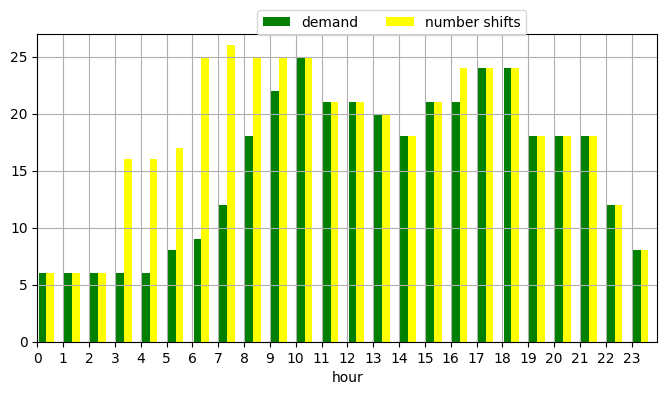

In [24]:
def plot_shifts(x_start):
    num_shifts = [sum([x_start[k % 24] for k in range(i-7, i+1)])
                  for i in range(24)]
    margin = 0.2
    width = 0.3
    plt.figure(figsize=(8, 4))
    plt.bar([h + margin for h in range(24)], d, width=width, color='green')
    plt.bar([h + margin + width for h in range(24)],
            num_shifts, width=width, color='yellow')
    plt.xlabel("hour")
    plt.legend(['demand', 'number shifts'], ncol=2, bbox_to_anchor=(0.8, 1.1))
    plt.xlim(0, 24)
    plt.ylim(0, max(num_shifts + d) + 1)
    plt.xticks(range(24), [i % 24 for i in range(24)])
    plt.grid()
    plt.show()


plot_shifts([hourly_shift[i].x for i in range(24)])